In [1]:
#TODO: 
    #Collect data
    #Formate data into data frame
    #write my_alpha function
    #Calculate SLEY
    #Plot Stock Price vs. my_alpha

# Alpha Vs. Stock Price
## Introduction:
    Alpha is the risk relative to the market.  Extended trading funds find their alpha to see how they are doing against the market.  They look at their gains against the gains of the S&P 500 to give a value to their performance. The goal of this notebook is to find the alpha of different popular stocks in the S&P 500 and find a correlation between the alpha and the stock price.  For example, Tesla vs. S&P 500, how does the difference between the two mean about the stock?
### My Alpha Formula:
    Since I did not find documentation about the Alpha formula I figured my own version of alpha (atleast what I want to test) is the change of the security vs. the change of the overhead index.  SO, my own derivation for this idea is shown below: 

### Underlying Security Price: z
### Overhead Index Price: i
### My Alpha formula: α = Δz/Δt - Δi/Δt

## Hypothesis:
    Stock's with over inflated Alpha's are overextended and due for a recorrection.  A recorrection may be an increase or a decrease to a more median price with respect to the overhead index.  

## Procedure:
## Part 1: Plotting alpha values vs. stock prices
### 1. Import Libraries

In [63]:
import pandas as pd
import pandas_datareader as web
import statistics
import numpy as np
import math
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

### 2. Import the S&P 500 Data and visualize the data

In [56]:
stock = "GSPC"
df_spy = web.DataReader('^' + stock, data_source = 'yahoo', start = '2020-01-31', end = '2021-01-01')

<function matplotlib.pyplot.show(*args, **kw)>

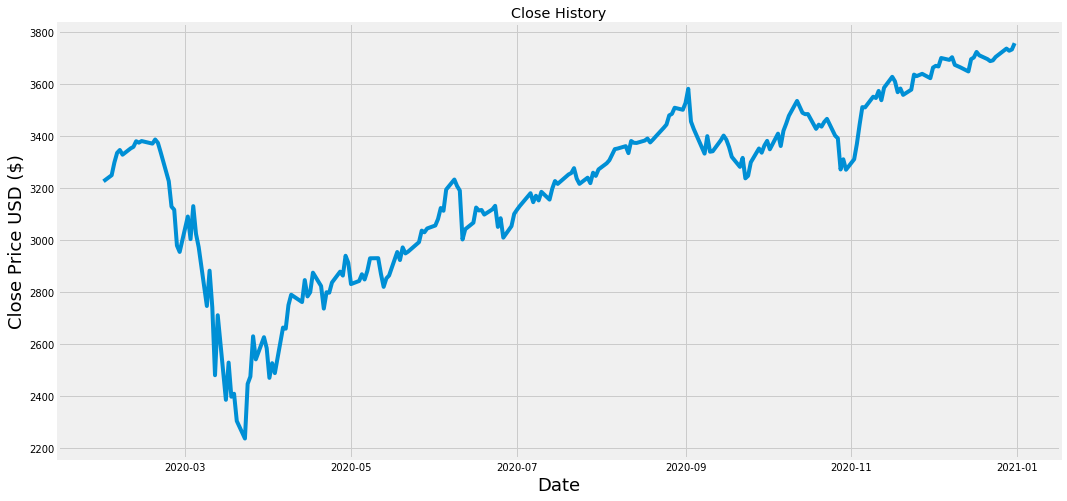

In [57]:
plt.figure(figsize = (16,8))
plt.title('Close History')
plt.plot(df_spy['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.show

### 3. Import the stock to test (in this case Microsoft) and visualize the data

In [5]:
#Import data for microsoft
df_msft = web.DataReader('MSFT', data_source = 'yahoo', start = '2020-01-01', end = '2021-01-01')

<function matplotlib.pyplot.show(*args, **kw)>

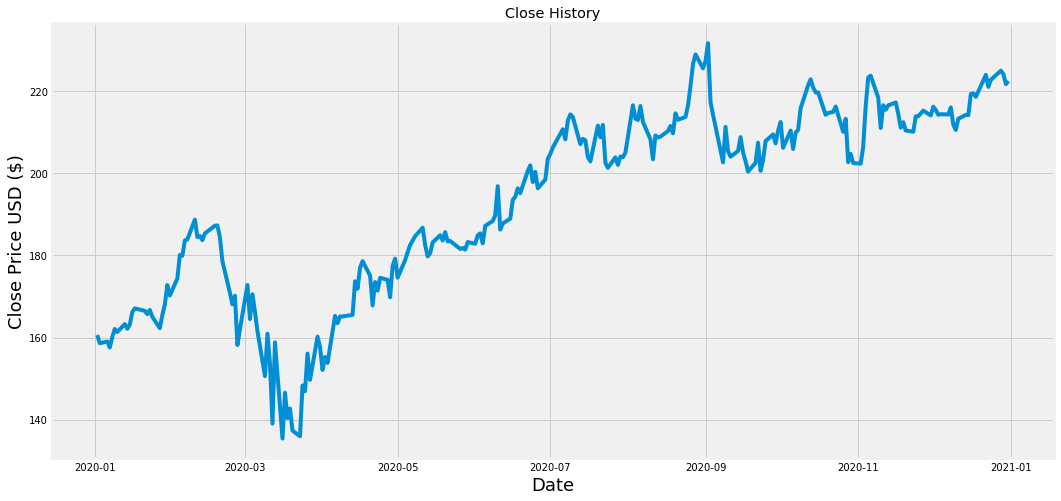

In [6]:
#Plot adj. close of microsoft over the past year
plt.figure(figsize = (16,8))
plt.title('Close History')
plt.plot(df_msft['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.show

### 4. 

<function matplotlib.pyplot.show(*args, **kw)>

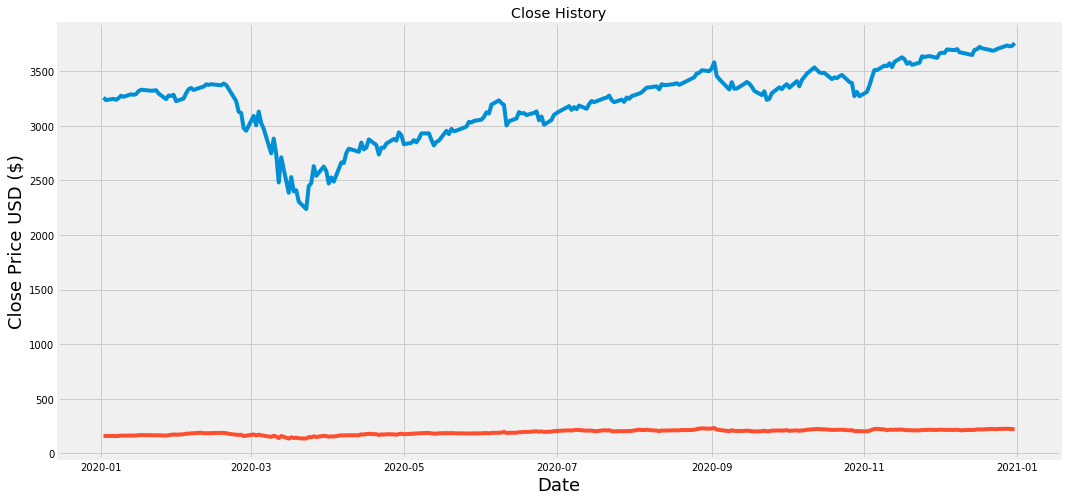

In [7]:
#Plotting S&P 500 vs MSFT
plt.figure(figsize = (16,8))
plt.title('Close History')
plt.plot(df_spy['Close'], label = 'SPY')
plt.plot(df_msft['Close'], label = 'MSFT')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.show

In [8]:
def my_alpha(stock, index, time):
    alpha = []
    for i in range(time):
        alpha.append([0])

    for i in range(len(stock)-time):
        z = (stock[i+time] - stock[i])/time
        a = (index[i+time] - index[i])/time
        alpha.append([z-a])
    
    return alpha

In [9]:
#Here we reform the data to be able to compute the alpha value

msft_close = pd.to_numeric(df_msft['Close'])
#(msft_close[1] - msft_close[2])/2
spy_close = pd.to_numeric(df_spy['Close'])
#(spy_close[1] - spy_close[2])/2
#alpha = []

#for i in range(len(msft_close)-5):
    #z = (msft_close[i+5] - msft_close[i])/5
    #a = (spy_close[i+5] - spy_close[i])/5
    #alpha.append([z-a])

alpha = my_alpha(msft_close, spy_close, 5)    

alpha

[[0],
 [0],
 [0],
 [0],
 [0],
 [-3.075970458984375],
 [-5.555999755859375],
 [-7.519970703125001],
 [-8.283993530273436],
 [-6.629998779296875],
 [-7.606021118164062],
 [-11.702001953125],
 [-5.888031005859375],
 [-7.006021118164063],
 [-6.541998291015625],
 [4.0420166015625],
 [16.23404541015625],
 [8.702011108398438],
 [10.138018798828126],
 [9.588024902343749],
 [15.02799072265625],
 [1.361993408203125],
 [-1.3380218505859376],
 [-9.886007690429688],
 [-10.254022216796876],
 [-17.705987548828126],
 [-17.770034790039062],
 [-11.16798095703125],
 [-7.989999389648438],
 [-5.6159820556640625],
 [-10.197988891601563],
 [-3.933990478515625],
 [-5.111981201171875],
 [1.185992431640625],
 [6.213986206054687],
 [27.962002563476563],
 [44.58401794433594],
 [50.53000183105468],
 [73.64599304199218],
 [73.39000549316405],
 [27.511981201171878],
 [24.255966186523438],
 [-2.6700439453125],
 [-7.4179840087890625],
 [-3.7180267333984376],
 [64.29998474121095],
 [23.510028076171874],
 [74.3640472412

In [49]:
stock_price = [x for x in msft_close]
#for i in range(len(msft_close)):
#    stock_price.append([msft_close[i]])

<function matplotlib.pyplot.show(*args, **kw)>

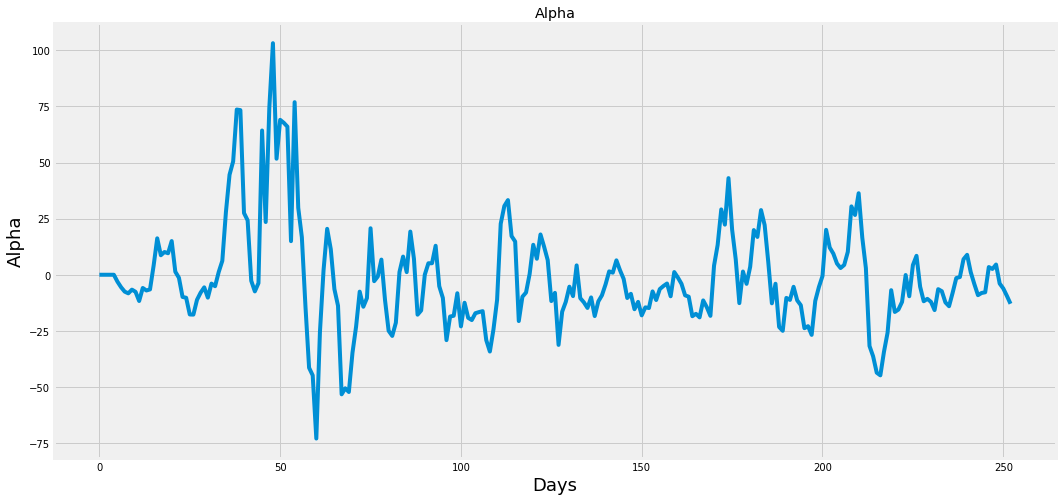

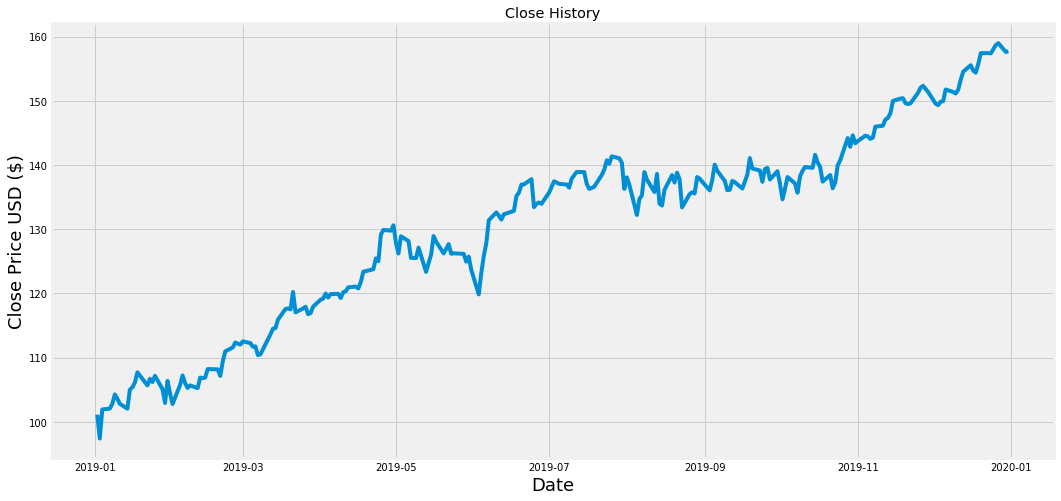

In [50]:
plt.figure(figsize = (16,8))
plt.title('Alpha')
plt.plot(alpha)
plt.xlabel('Days', fontsize = 18)
plt.ylabel('Alpha', fontsize = 18)
plt.show

plt.figure(figsize = (16,8))
plt.title('Close History')
plt.plot(df_msft['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.show

In [47]:
twenty_five_day_alpha = my_alpha(msft_close, spy_close, 20)
print(stock_price[1])
#adjusted = [x+25 for x in twenty_five_day_alpha]

[158.6199951171875]


<function matplotlib.pyplot.show(*args, **kw)>

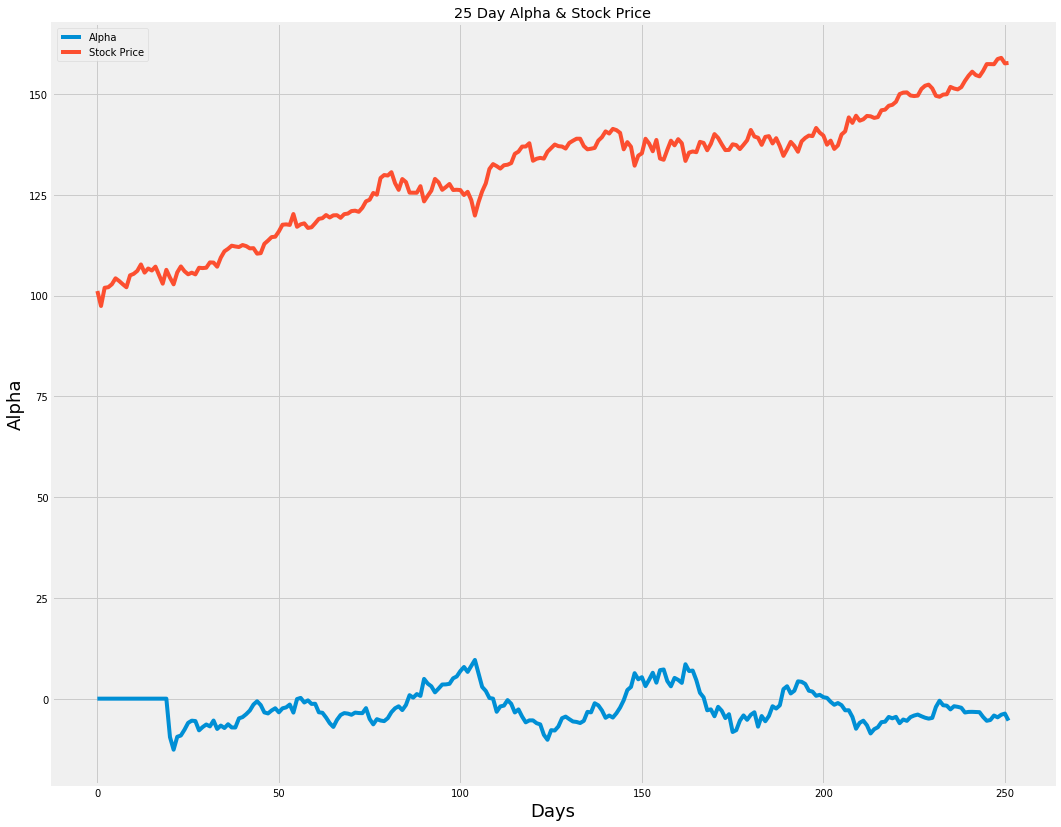

In [51]:
#Visualizing the data
plt.figure(figsize = (16,14))
plt.title('25 Day Alpha & Stock Price')
plt.plot(twenty_five_day_alpha, label = 'Alpha')
plt.plot(stock_price, label = 'Stock Price')
plt.xlabel('Days', fontsize = 18)
plt.ylabel('Alpha', fontsize = 18)
plt.legend(loc = 'upper left')
plt.show

In [52]:
ten_day_alpha = my_alpha(msft_close, spy_close, 10)

<function matplotlib.pyplot.show(*args, **kw)>

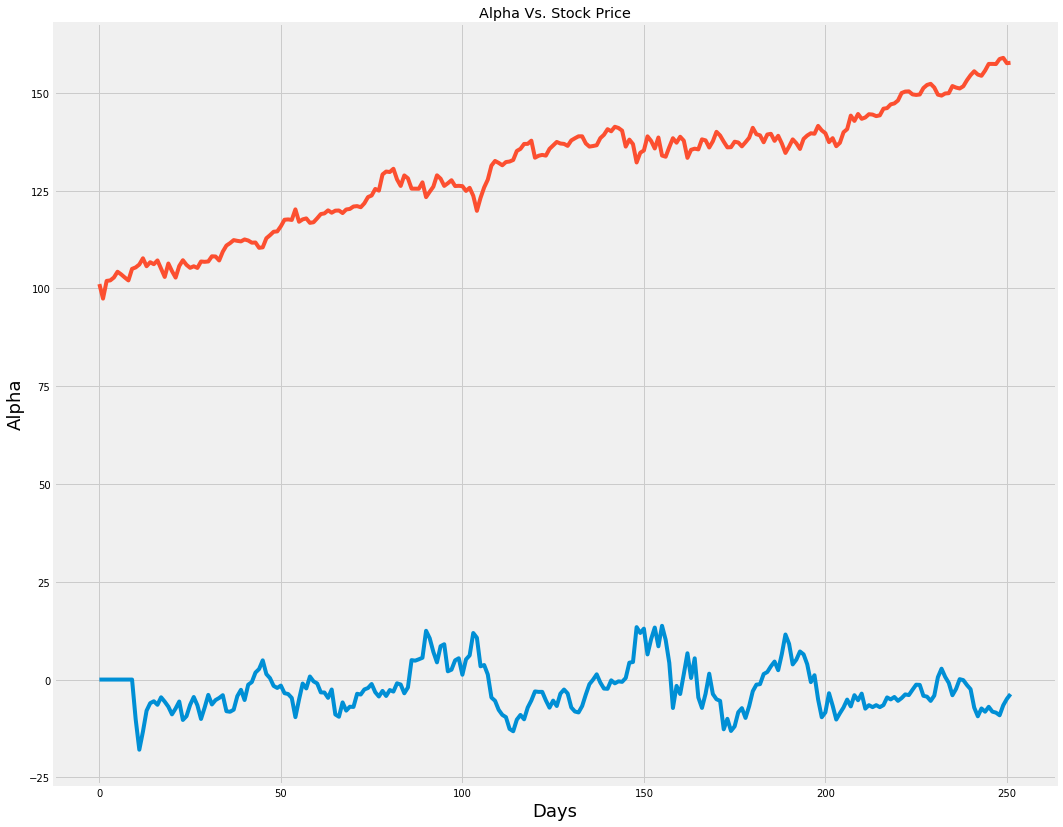

In [53]:
plt.figure(figsize = (16,14))
plt.title('Alpha Vs. Stock Price')
plt.plot(ten_day_alpha)
plt.plot(stock_price)
plt.xlabel('Days', fontsize = 18)
plt.ylabel('Alpha', fontsize = 18)
plt.show

# Part 2: Drawing Conclusions and Identifying Implications
## Relative Maximum and Minimum
    Now that we have visualized the data we need to see how the data interacts with one another.  To measure the interactions I will be finding relative maximums and minimums of each and comparing the index value of the two.  What I hope to find is that the Alpha relative max/min happens prior to the relative max/min of the underlying security.  
    

In [54]:
def outliers(alpha):
    arr = np.array(alpha)
    arr = arr.flatten()
    sd = statistics.stdev(arr)
    outliers = []
    positive_outlier_idx = []
    negative_outlier_idx = []
    for i in range(len(arr)):
        
        if not(arr[i] > sd or arr[i] < -sd):
            outliers.append(np.nan)
        
        if arr[i] > sd:
            outliers.append(arr[i])
            positive_outlier_idx.append(i)
        else:
            positive_outlier_idx.append(np.nan)
        
        if arr[i] < -sd:
            outliers.append(arr[i])
            negative_outlier_idx.append(i)
        else:
            negative_outlier_idx.append(np.nan)
            
    return (positive_outlier_idx, negative_outlier_idx)

In [40]:
arr = np.array(alpha)
arr = arr.flatten()
sd = statistics.stdev(arr)
outliers = []
positive_outlier_idx = []
negative_outlier_idx = []
for i in range(len(arr)):
    if arr[i] > sd or arr[i] < sd:
        outliers.append(np.nan)
    if arr[i] > sd:
        outliers.append(arr[i])
        positive_outlier_idx.append(i)
    else:
        positive_outlier_idx.append(np.nan)
        
    if arr[i] < -sd:
        outliers.append(arr[i])
        negative_outlier_idx.append(i)
    else:
        negative_outlier_idx.append(np.nan)

print(len(arr))

253


[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 90, 91, 92, nan, 94, 95, nan, nan, nan, nan, nan, nan, 102, 103, 104, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 148, 149, 150, 151, 152, 153, 154, 155, 156, nan, nan, nan, nan, nan, 162, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 188, 189, 190, nan, nan, 193, 194, nan, nan, nan, nan, nan, nan,

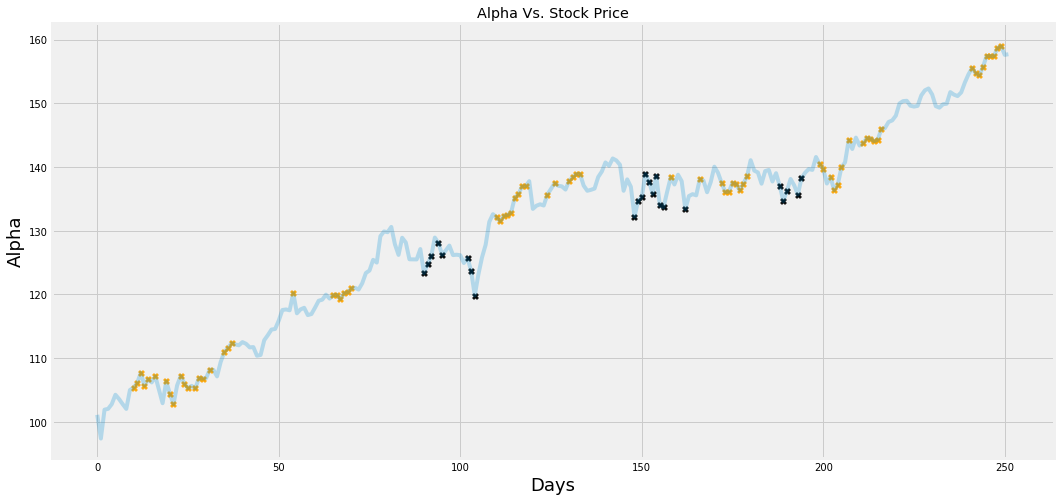

In [58]:
outlier = []
positive_outlier_idx, negative_outlier_idx = outliers(ten_day_alpha)

plt.figure(figsize = (16,8))
plt.title('Alpha Vs. Stock Price')
plt.plot(stock_price, alpha = .25)
plt.scatter(positive_outlier_idx, stock_price, label = 'Outlier', marker = 'X', color = 'Black')
plt.scatter(negative_outlier_idx, stock_price, label = 'Outlier', marker = 'X', color = 'Orange')
plt.xlabel('Days', fontsize = 18)
plt.ylabel('Alpha', fontsize = 18)
plt.show
print(positive_outlier_idx)
print(negative_outlier_idx)

In [37]:
#Looks like whenever there is a high outlier the stock drops and whenever there is a low outlier the stock rises
#Let's see the profitability of buying at the negative outliers of alpha and selling at the positive outliers
def profit(buy,sell,stock_price):
    bought_price = []
    sell_price = []
    earnings = 0
    #buy = buy.flatten()
    #sell = sell.flatten()
    stock_price = np.array(stock_price)
    stock_price = stock_price.flatten()
    
    for i in range(len(buy)):
        if not pd.isnull(buy[i]):
            bought_price.append(stock_price[i])
        if not pd.isnull(sell[i]):
            sell_price.append(stock_price[i])
        
    #sell_price.append(data['BTC'][len(data)-1])
    bought_price.pop(0)
    sell_price.pop(0)
    
    #bought_price = bought_price[np.logical_not(pd.isnull(bought_price))]
    #sell_price = sell_price[np.logical_not(pd.isnull(sell_price))]
    #bought_price.dropna()
    #sell_price.dropna()
    for i in range(len(bought_price)):
        #print(float(bought_price[i]))
        #print(float(sell_price[i]))
        partial_sum = float(sell_price[i]) - float(bought_price[i])
        earnings += partial_sum
        
    return (earnings)
profit(positive_outlier_idx, negative_outlier_idx, outlier)

IndexError: index 35 is out of bounds for axis 0 with size 0

In [26]:
#profit(negative_outlier_idx,positive_outlier_idx,stock_price)
sp = stock_price[1:248]
bought_price = []
sell_price = []
earnings = 0
    
for i in range(len(sp)):
    if not pd.isnull(positive_outlier_idx[i]):
        buy_price.append(sp[i])
    if not pd.isnull(negative_outlier_idx[i]):
        sell_price.append(sp[i])
    #else:
        #bought_price.append(0)
        #sell_price.append(0)
        
#sell_price.append(data['BTC'][len(data)-1])
#for i in range(len(bought_price)):
    #if bought_price 
bought_price.pop(0)
sell_price.pop(0)
    
    #bought_price = bought_price[np.logical_not(pd.isnull(bought_price))]
    #sell_price = sell_price[np.logical_not(pd.isnull(sell_price))]
    #bought_price.dropna()
    #sell_price.dropna()
for i in range(len(bought_price)):
        #print(float(bought_price[i]))
        #print(float(sell_price[i]))
    partial_sum = float(sell_price[i]) - float(bought_price[i])
    earnings += partial_sum
    
print(earnings)

NameError: name 'buy_price' is not defined

In [79]:
def profit(alpha):
    positive_outlier_idx, negative_outlier_idx = outliers(ten_day_alpha)
    positive_values = []
    negative_values = []
    markers = []
    j = 0
    k = 0
    l = 0
    for i in range(len(positive_outlier_idx)):
        if(not math.isnan(positive_outlier_idx[i])):
            positive_values.append(positive_outlier_idx[i])
    for i in range(len(negative_outlier_idx)):
        if(not math.isnan(negative_outlier_idx[i])):
            negative_values.append(negative_outlier_idx[i])
    #Make an array to store all of the starting values
    #EX: from microsoft 10day alpha it would store:
    #[10,70,90,104,110,133,148,156,158,162,166,...]
    while(l < (len(positive_values)+len(negative_values))):
        if((positive_values[j] < negative_values[k])):
            markers.append(positive_values[j])
            j += 1
        elif((negative_values[k] < positive_values[j])):
            markers.append(negative_values[k])
            k += 1
        l += 1
    return (markers)
profit(ten_day_alpha)

[10,
 11,
 12,
 13,
 14,
 16,
 19,
 20,
 21,
 23,
 24,
 25,
 27,
 28,
 29,
 31,
 35,
 36,
 37,
 54,
 65,
 66,
 67,
 68,
 69,
 70,
 90,
 91,
 92,
 94,
 95,
 102,
 103,
 104,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 124,
 126,
 130,
 131,
 132,
 133,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 158,
 162,
 166,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 188,
 189,
 190,
 193,
 194]

In [27]:
earnings/stock_price[252]

TypeError: unsupported operand type(s) for /: 'int' and 'list'

In [28]:
#Let's see how it does in the 2019 market
df_spy = web.DataReader('^GSPC', data_source = 'yahoo', start = '2019-01-01', end = '2020-01-01')
df_msft = web.DataReader('MSFT', data_source = 'yahoo', start = '2019-01-01', end = '2020-01-01')

<function matplotlib.pyplot.show(*args, **kw)>

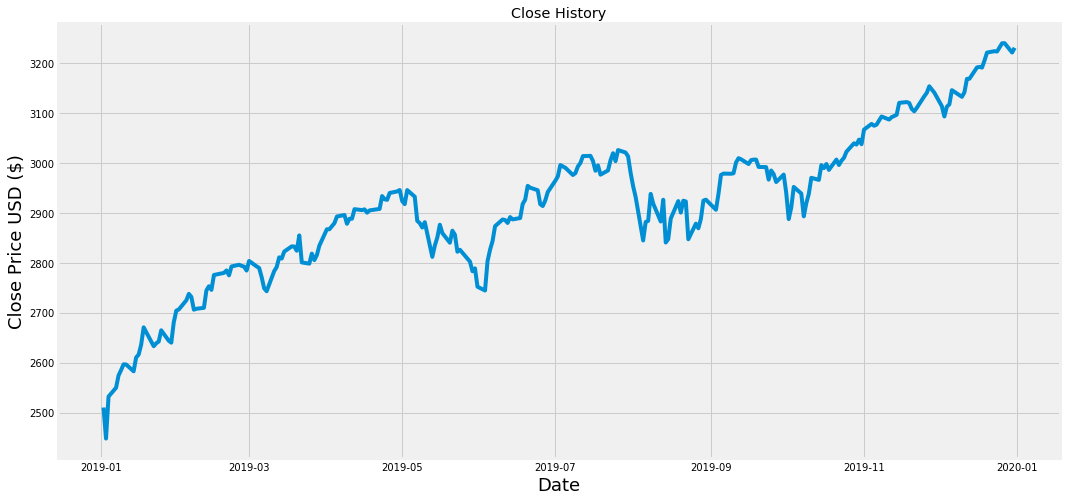

In [29]:
plt.figure(figsize = (16,8))
plt.title('Close History')
plt.plot(df_spy['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

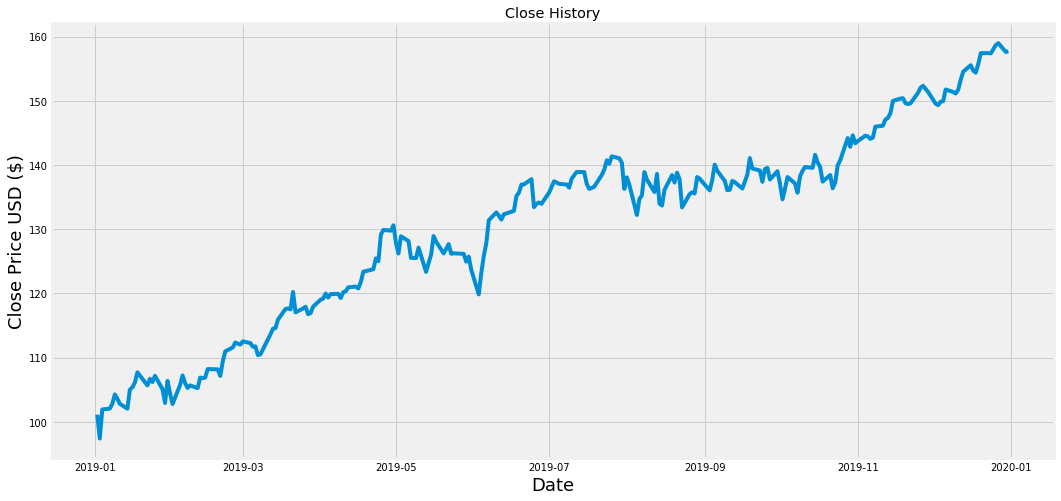

In [30]:
plt.figure(figsize = (16,8))
plt.title('Close History')
plt.plot(df_msft['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.show

In [31]:
msft_close = df_msft['Close']
spy_close = df_spy['Close']

alpha_10days_2019 = my_alpha(msft_close, spy_close, 10)

<function matplotlib.pyplot.show(*args, **kw)>

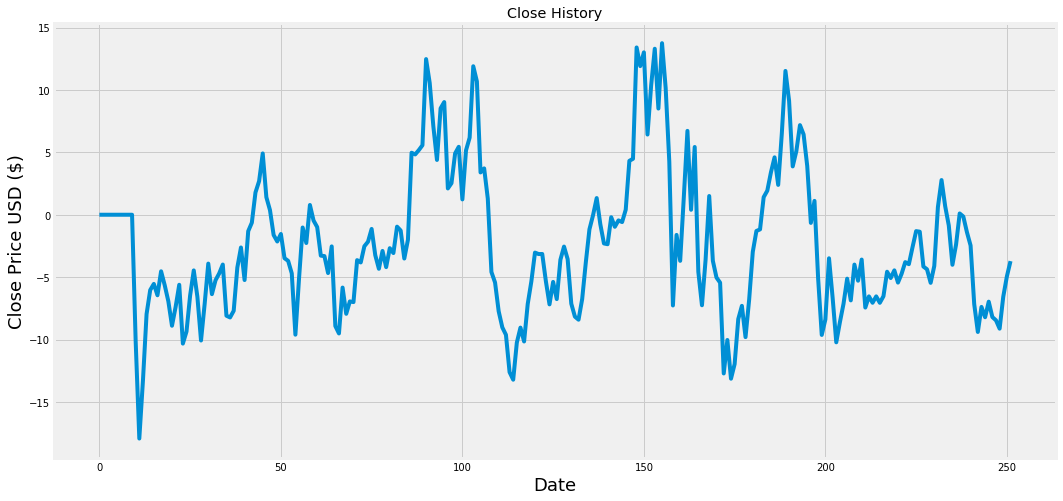

In [32]:
plt.figure(figsize = (16,8))
plt.title('Close History')
plt.plot(alpha_10days_2019)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.show

In [33]:
pos_outlier_2019, neg_outlier_2019, outlier_2019 = outliers(alpha_10days_2019)

stock_price = []
for i in range(len(msft_close)):
    stock_price.append([msft_close[i]])

plt.figure(figsize = (16,8))
plt.title('Alpha Vs. Stock Price')
plt.plot(stock_price, alpha = .25)
plt.scatter(pos_outlier_2019, stock_price, label = 'Outlier', marker = 'X', color = 'Black')
plt.scatter(neg_outlier_2019, stock_price, label = 'Outlier', marker = 'X', color = 'Orange')
plt.xlabel('Days', fontsize = 18)
plt.ylabel('Alpha', fontsize = 18)
plt.show

TypeError: 'list' object is not callable

## Midpoint Conclusion:
    I can now make a new conclusion about the 'alphas' and that the negative and the positive alphas should be looked at in their own in sets.  I notice that for the negative outliers if you buy when a negative outlier happens, down the line you will see profits.  Whereas, with a positive outlier the stock does begin to become more bearish overall.  I want to write a profit function for when there is a negative alpha we have a buy and we have a sell when there is a positive alpha.  The issue with this is the positve and negative alphas happen at the same time where as we cannot simply know when to sell the stock or buy the stock back.  There are also different issues with the thought process.  Firstly, buying at negative and selling at positive will not garuantee profits.  Secondly, almost always it was a smart buy to have bought at negative alphas.  Thirdly, a positive alpha is a great indicator that the investor should not buy the stock because it will be bearish for this incoming time.  

## Next: let's see alphas over 3 years and see if there is any conclusions to be drawn.  


In [34]:
df_spy_3 = web.DataReader('^GSPC', data_source = 'yahoo', start = '2018-01-01', end = '2021-01-01')
df_msft_3 = web.DataReader('MSFT', data_source = 'yahoo', start = '2018-01-01', end = '2021-01-01')

In [35]:
msft_close_3 = df_msft_3['Close']
spy_close_3 = df_spy_3['Close']

alpha_3 = my_alpha(msft_close_3, spy_close_3, 10)

In [36]:
pos_outlier_3, neg_outlier_3, outlier_3 = outliers(alpha_3)

stock_price = []
for i in range(len(msft_close_3)):
    stock_price.append([msft_close_3[i]])

plt.figure(figsize = (16,8))
plt.title('Alpha Vs. Stock Price')
plt.plot(stock_price, alpha = .25)
plt.scatter(pos_outlier_3, stock_price, label = 'Outlier', marker = 'X', color = 'Black')
plt.scatter(neg_outlier_3, stock_price, label = 'Outlier', marker = 'X', color = 'Orange')
plt.xlabel('Days', fontsize = 18)
plt.ylabel('Alpha', fontsize = 18)
plt.show

TypeError: 'list' object is not callable

## Different Conclusions:
### The difference of 3 years and the effects of covid:
    Looking back to three years ago a strong case can be made that when a positive outlier is hit we can hit a buy.  Another very apparant conclusion is that 2020 is a very volatile year and that conclusions drawn from a year of high volatility cannot be used in this instance as 2020 itself is a 

In [ ]:
run volatility_of_stock_vs_market.py